In [ ]:
import os
import matplotlib.pyplot as plt
# enable using OpenEXR with OpenCV
os.environ['OPENCV_IO_ENABLE_OPENEXR'] = "1"
import cv2
import numpy as np
from brisque import BRISQUE

FILE_PATH = os.path.normpath("./data/reference/001.exr")

def read_exr(im_path: str) -> np.ndarray:
    return cv2.imread(
    filename=im_path,
    flags=cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH
    )
def tone_map_reinhard(image: np.ndarray) -> np.ndarray:
    tonemap_operator = cv2.createTonemapReinhard(
    gamma=2.2,
    intensity=0.0,
    light_adapt=0.0,
    color_adapt=0.0
    )
    result = tonemap_operator.process(src=image)
    return result
def tone_map_mantiuk(image: np.ndarray) -> np.ndarray:
    tonemap_operator = cv2.createTonemapMantiuk(
    gamma=2.2,
    scale=0.85,
    saturation=1.2
    )
    result = tonemap_operator.process(src=image)
    return result

def evaluate_image(image: np.ndarray) -> float:
    metric = BRISQUE(url=False)
    return metric.score(img=image)

def fix_colors(img):
    img = np.clip(img / np.max(img), 0, 1)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


[ WARN:0@0.566] global matrix_expressions.cpp:1333 assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [120.5..65504.0].


tone_mapped_reinhard 29.35482857755025
tone_mapped_mantiuk 28.249648504374562


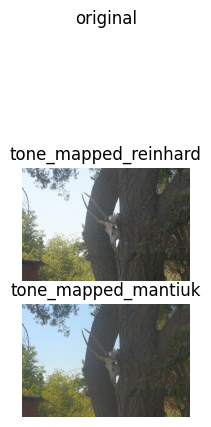

In [ ]:
image = read_exr(im_path=FILE_PATH)
tone_mapped_reinhard = tone_map_reinhard(image)
tone_mapped_mantiuk = tone_map_mantiuk(image)

fig, axes = plt.subplots(3, 1, figsize=(10, 5)) 

axes[0].imshow(fix_colors(image))
axes[0].axis('off')
axes[0].set_title("original")

axes[1].imshow(fix_colors(tone_mapped_reinhard))
axes[1].axis('off')
axes[1].set_title("tone_mapped_reinhard")

axes[2].imshow(fix_colors(tone_mapped_mantiuk))
axes[2].axis('off')
axes[2].set_title("tone_mapped_mantiuk")

print('tone_mapped_reinhard', evaluate_image(image=tone_mapped_reinhard))
print('tone_mapped_mantiuk', evaluate_image(image=tone_mapped_mantiuk))